## Objective: Comparing variability in response variable (log caloric yields) for “similar” set of inputs
Basically checking variability in response variable (= calories per ha for all crops aggregated), when all inputs very similar

*Y a-t-il des pixels très semblables (attributs identiques ou proches) qui ont des valeurs très différentes pour les calories? (peut-être parce que dans ce champ on fait pousser des patates, et dans le champ voisin/identique des endives ou du céleri: pas exactement la même quantité de calories!)*

## Rapid Clustering method
Here "similar pixels" = all inputs are the same, when rounding (normalized inputs) at {#decimals}

In [2]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [26]:
def find_exact_clusters(df,threshold=100):
    result=pd.DataFrame(columns=['key','min','max','avg','ratio','size'])
    clusters = dict()   # Each entry is key => values = [list of log_ca for records with this key]
    
    for index, row in df.iterrows():
        log_ca = row[0]
        row2 = []
        for cell in row[1:]: 
            row2.append('{:.1f}'.format(cell))
        key = '_'.join(row2)
        if key not in clusters:
            clusters[key] = [log_ca]
        else:
            clusters[key].append(log_ca)
        
    sorted_by_value = sorted(clusters.items(), key=lambda kv: len(kv[1]), reverse=True)
    n = 0
    for kv in sorted_by_value:
        n += 1
        if n>threshold: break
        key = kv[0]
        values = kv[1]
        vmin, vmax, vave = min(values), max(values), sum(values)/len(values)
        ratio = np.exp(vmax-vmin)
        if len(values)>1:
            result = result.append({'key':key,'min':min(values),'max':max(values),
                                 'avg':sum(values)/len(values),'ratio':ratio,'size': len(values)}, ignore_index=True)
        #print('{} \n\t min={:.3f} max={:.3f} ave={:.3f}, ratio={:.1f}, size={}\n'.format(
        #    key, min(values), max(values), sum(values)/len(values), ratio, len(values)))
    
    return (result)

### Results with baseline_df as of 11/2018

In [6]:
baseline_df = pd.read_csv('../Data/intermediate/baseline_df.csv')
baseline_df = baseline_df.set_index('pixel_id')

In [16]:
baseline_df_n = pd.read_csv('../Data/intermediate/baseline_df_normalized.csv')
baseline_df_norm = baseline_df_n.set_index('pixel_id')

In [13]:
find_exact_clusters(baseline_df.round(0),10)

,key,min,max,avg,ratio,size
0,3870.0_0.0_10.0_22.0_1361.0_23.0_-24.0_47.0_40...,22.0,22.0,22.0,1.0,3
1,2344.0_2.0_11.0_23.0_1398.0_26.0_-23.0_49.0_33...,22.0,22.0,22.0,1.0,3
2,3870.0_6.0_8.0_22.0_1110.0_24.0_-15.0_39.0_516...,22.0,22.0,22.0,1.0,3
3,34756.0_2.0_8.0_23.0_975.0_19.0_-16.0_35.0_607...,23.0,23.0,23.0,1.0,2
4,3870.0_2.0_8.0_20.0_1042.0_20.0_-18.0_38.0_614...,22.0,22.0,22.0,1.0,2
5,3870.0_4.0_8.0_23.0_891.0_20.0_-13.0_33.0_701....,22.0,22.0,22.0,1.0,2
6,3870.0_3.0_8.0_21.0_1054.0_21.0_-17.0_38.0_608...,22.0,22.0,22.0,1.0,2
7,3870.0_3.0_8.0_22.0_1043.0_21.0_-17.0_38.0_605...,22.0,22.0,22.0,1.0,2
8,3870.0_-1.0_10.0_20.0_1391.0_22.0_-26.0_48.0_5...,22.0,22.0,22.0,1.0,2
9,3870.0_3.0_8.0_21.0_1059.0_21.0_-17.0_38.0_611...,22.0,22.0,22.0,1.0,2


In [17]:
find_exact_clusters(baseline_df_norm.round(0),10)

,key,min,max,avg,ratio,size
0,-1.0_-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0...,-1.0,-0.0,-0.151860,2.718282,5808
1,-1.0_0.0_-0.0_-1.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0...,0.0,1.0,0.068567,2.718282,5017
2,0.0_0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_...,-1.0,1.0,0.148965,7.389056,4397
3,-1.0_-0.0_-0.0_-1.0_0.0_-0.0_-0.0_0.0_-1.0_-1....,-1.0,-0.0,-0.139416,2.718282,3529
4,0.0_0.0_-0.0_-1.0_-0.0_0.0_0.0_0.0_-1.0_-1.0_-...,0.0,1.0,0.344838,2.718282,3477
5,-1.0_-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0...,-1.0,-0.0,-0.080026,2.718282,3074
6,-1.0_0.0_-1.0_-1.0_-0.0_-0.0_0.0_-0.0_-1.0_-1....,0.0,1.0,0.041907,2.718282,2601
7,-1.0_-0.0_-1.0_-1.0_-0.0_-0.0_-0.0_-0.0_-1.0_-...,-1.0,-0.0,-0.001577,2.718282,2536
8,0.0_0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-...,0.0,1.0,0.977282,2.718282,2465
9,-0.0_-0.0_-0.0_-1.0_0.0_-0.0_-0.0_0.0_-1.0_-1....,0.0,0.0,0.000000,1.000000,2406


In [20]:
r = find_exact_clusters(baseline_df_norm.round(0),100).sort_values('ratio',ascending=False)
r

,key,min,max,avg,ratio,size
45,-1.0_1.0_0.0_0.0_-1.0_1.0_1.0_-0.0_-1.0_-1.0_-...,-2.0,-0.0,-0.785191,7.389056,1229
12,-1.0_1.0_-0.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,-0.073246,7.389056,2280
39,-1.0_1.0_-0.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,-0.098592,7.389056,1349
37,-1.0_1.0_-0.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,0.010094,7.389056,1387
18,-1.0_1.0_0.0_0.0_-1.0_1.0_1.0_-0.0_-1.0_-1.0_-...,-2.0,-0.0,-0.911186,7.389056,2083
86,-1.0_1.0_-0.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,0.000000,7.389056,827
68,-1.0_0.0_-0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0...,-1.0,1.0,0.016860,7.389056,949
25,-1.0_1.0_-0.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,-0.055687,7.389056,1688
43,-1.0_1.0_-0.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,-0.082288,7.389056,1276
69,-1.0_0.0_-0.0_-1.0_-0.0_0.0_-0.0_0.0_-1.0_-1.0...,-1.0,1.0,0.088017,7.389056,943


In [21]:
r = find_exact_clusters(baseline_df_norm.round(0),1000).sort_values('ratio',ascending=False)
r

,key,min,max,avg,ratio,size
557,-1.0_1.0_0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_...,-2.0,1.0,-0.167421,20.085537,221
842,-1.0_1.0_-1.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-2.0,1.0,-0.348387,20.085537,155
166,-1.0_0.0_-0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0...,-1.0,1.0,0.005376,7.389056,558
853,-1.0_1.0_-0.0_1.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,-0.058824,7.389056,153
391,-1.0_1.0_-1.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,-0.299652,7.389056,287
390,-1.0_1.0_0.0_0.0_-1.0_1.0_1.0_-0.0_-1.0_-1.0_-...,-2.0,-0.0,-0.871080,7.389056,287
157,-1.0_0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0...,-1.0,1.0,0.001721,7.389056,581
839,-1.0_1.0_0.0_0.0_-1.0_1.0_1.0_-0.0_-1.0_-1.0_-...,-2.0,-0.0,-0.838710,7.389056,155
389,-1.0_1.0_-0.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-1.0,1.0,-0.114583,7.389056,288
160,-1.0_1.0_0.0_0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_-...,-2.0,-0.0,-0.437931,7.389056,580


In [22]:
e = find_exact_clusters(baseline_df_norm.round(0),10000).sort_values('ratio',ascending=False)
e

,key,min,max,avg,ratio,size
1709,-1.0_1.0_0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_...,-2.0,1.0,-0.813953,20.085537,86
1300,-1.0_1.0_-1.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-3.0,-0.0,-1.454545,20.085537,110
3619,-1.0_1.0_0.0_0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_-...,-2.0,1.0,-0.853659,20.085537,41
3621,-1.0_1.0_0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_...,-2.0,1.0,-0.512195,20.085537,41
842,-1.0_1.0_-1.0_0.0_-1.0_0.0_1.0_-1.0_-1.0_-1.0_...,-2.0,1.0,-0.348387,20.085537,155
557,-1.0_1.0_0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_...,-2.0,1.0,-0.167421,20.085537,221
1463,-1.0_1.0_0.0_0.0_-1.0_0.0_1.0_-0.0_-1.0_-1.0_-...,-2.0,1.0,-0.474747,20.085537,99
6824,-1.0_1.0_0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_...,-2.0,1.0,-0.500000,20.085537,20
6819,-1.0_1.0_0.0_0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_-...,-2.0,1.0,-1.050000,20.085537,20
2207,-1.0_1.0_0.0_-0.0_-1.0_0.0_0.0_-0.0_-1.0_-1.0_...,-2.0,1.0,-0.485294,20.085537,68


In [23]:
f = find_exact_clusters(baseline_df_norm.round(1),1000).sort_values('ratio',ascending=False)
f

,key,min,max,avg,ratio,size
558,-1.0_0.9_0.2_-0.1_-0.5_0.7_0.6_-0.2_-0.9_-0.9_...,-1.4,0.1,0.044444,4.481689,27
415,0.1_0.4_-0.1_-0.5_-0.2_0.4_0.2_-0.0_-0.7_-0.9_...,-0.3,1.1,0.240000,4.055200,30
349,0.1_0.4_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.7_-0.9_...,-1.0,0.4,0.071875,4.055200,32
734,0.1_0.5_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.6_-0.9_...,-0.7,0.6,0.154167,3.669297,24
753,-0.9_0.7_0.3_0.0_-0.6_0.5_0.5_-0.2_-0.9_-1.0_-...,-1.4,-0.1,-0.558333,3.669297,24
500,0.1_0.4_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.6_-0.9_...,-0.6,0.6,0.235714,3.320117,28
165,0.1_0.4_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.6_-0.9_...,-0.6,0.6,0.274419,3.320117,43
389,-0.9_0.7_0.3_0.1_-0.7_0.5_0.5_-0.3_-0.9_-0.9_-...,-1.4,-0.2,-0.780645,3.320117,31
873,0.1_0.5_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.6_-0.9_...,-0.6,0.6,0.063636,3.320117,22
466,-0.9_0.7_0.3_0.0_-0.6_0.5_0.5_-0.2_-0.9_-1.0_-...,-1.4,-0.2,-0.534483,3.320117,29


In [25]:
f = find_exact_clusters(baseline_df_norm.round(1),10000).sort_values('ratio',ascending=False)
f

,key,min,max,avg,ratio,size
1587,0.1_0.5_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.7_-0.9_...,-0.6,1.1,0.035294,5.473947,17
5146,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.5_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.340000,5.473947,10
4817,-1.0_0.9_0.2_-0.1_-0.5_0.7_0.6_-0.2_-0.9_-0.9_...,-1.5,0.1,-0.660000,4.953032,10
1806,0.1_0.5_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.7_-0.9_...,-0.7,0.9,0.056250,4.953032,16
3304,0.1_0.4_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.7_-0.9_...,-1.0,0.6,-0.108333,4.953032,12
558,-1.0_0.9_0.2_-0.1_-0.5_0.7_0.6_-0.2_-0.9_-0.9_...,-1.4,0.1,0.044444,4.481689,27
3303,0.1_0.4_-0.1_-0.4_-0.3_0.3_0.2_-0.1_-0.6_-0.9_...,-0.9,0.6,0.316667,4.481689,12
9422,-1.0_0.9_0.2_-0.1_-0.5_0.7_0.6_-0.2_-0.9_-0.9_...,-1.4,0.1,-0.328571,4.481689,7
9438,-1.0_0.9_0.2_-0.1_-0.5_0.7_0.6_-0.2_-0.9_-0.9_...,-1.4,0.1,-0.328571,4.481689,7
5782,0.1_0.4_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.7_-0.9_...,-1.0,0.5,-0.044444,4.481689,9


In [26]:
f = find_exact_clusters(baseline_df_norm.round(1),100000).sort_values('ratio',ascending=False)
f

,key,min,max,avg,ratio,size
29831,-0.9_0.6_0.2_-0.1_-0.5_0.5_0.4_-0.2_-0.9_-0.9_...,-1.6,0.2,-0.350000,6.049647,4
1587,0.1_0.5_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.7_-0.9_...,-0.6,1.1,0.035294,5.473947,17
24131,0.1_0.3_-0.1_-0.5_-0.3_0.3_0.2_-0.1_-0.7_-0.9_...,-0.8,0.9,0.325000,5.473947,4
83171,0.1_0.5_-0.2_-0.4_-0.4_0.4_0.4_-0.2_-0.6_-0.9_...,-1.1,0.6,-0.250000,5.473947,2
19531,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.5_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.340000,5.473947,5
29737,-0.9_0.6_0.1_-0.1_-0.6_0.4_0.4_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.850000,5.473947,4
29736,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.4_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.900000,5.473947,4
51728,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.5_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.600000,5.473947,3
29731,-0.9_0.6_0.1_-0.1_-0.6_0.4_0.4_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.875000,5.473947,4
51757,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.5_-0.3_-0.9_-0.9_...,-1.7,0.0,-0.566667,5.473947,3


In [31]:
fu = find_exact_clusters(baseline_df_norm.round(1),1000000).sort_values('ratio',ascending=False)
fu

,key,min,max,avg,ratio,size
117324,-0.9_0.6_0.2_-0.1_-0.6_0.5_0.4_-0.2_-0.9_-0.9_...,-1.6,0.3,-0.650000,6.685894,2
29831,-0.9_0.6_0.2_-0.1_-0.5_0.5_0.4_-0.2_-0.9_-0.9_...,-1.6,0.2,-0.350000,6.049647,4
24131,0.1_0.3_-0.1_-0.5_-0.3_0.3_0.2_-0.1_-0.7_-0.9_...,-0.8,0.9,0.325000,5.473947,4
83171,0.1_0.5_-0.2_-0.4_-0.4_0.4_0.4_-0.2_-0.6_-0.9_...,-1.1,0.6,-0.250000,5.473947,2
1587,0.1_0.5_-0.1_-0.4_-0.3_0.4_0.3_-0.1_-0.7_-0.9_...,-0.6,1.1,0.035294,5.473947,17
29736,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.4_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.900000,5.473947,4
117293,-0.9_0.6_0.2_-0.1_-0.6_0.5_0.4_-0.2_-0.9_-0.9_...,-1.7,-0.0,-0.850000,5.473947,2
29737,-0.9_0.6_0.1_-0.1_-0.6_0.4_0.4_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.850000,5.473947,4
51728,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.5_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.600000,5.473947,3
19531,-0.9_0.6_0.1_-0.0_-0.6_0.4_0.5_-0.3_-0.9_-0.9_...,-1.7,-0.0,-0.340000,5.473947,5


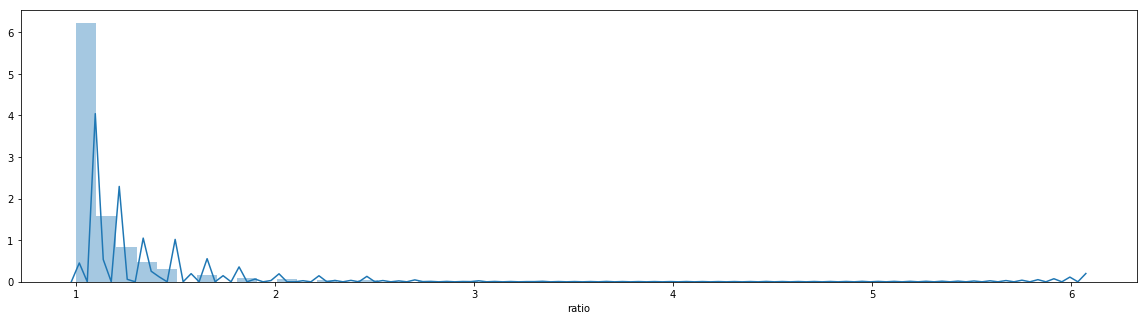

In [30]:
fig,ax = plt.subplots(figsize=(20,5))
sns.distplot(f['ratio'],ax=ax);

--> Ratio of max vs min yield for similar inputs is generally close to 1, and never over an order of magnitude difference. 

### Verification of method above - 2/2019

In [16]:
df_notnorm = pd.read_csv('../Data/intermediate/Baseline_df_iterations/baseline_df.csv')
df_notnorm = df_notnorm.set_index('pixel_id')

df_n = pd.read_csv('../Data/intermediate/Baseline_df_iterations/baseline_df_normalized.csv')
df_n = df_n.set_index('pixel_id')

In [5]:
df_n.head()

,log_calories_per_ha,gdp,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Annual Precipitation,...,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,slope,fertilizers,log_altitude,log_minutes_to_market,log_gdp_per_capita
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,0.274218,-0.051286,-0.147949,-0.511094,-0.751544,-0.130281,-0.218242,-0.140843,-0.095818,-0.859148,...,2,2.0,1.0,1.0,1.0,-0.995090,0.93308,-0.022162,-0.035803,0.255397
1276867,0.274218,-0.051286,-0.138626,-0.528159,-0.763533,-0.134247,-0.214637,-0.135698,-0.098845,-0.861364,...,0,2.0,1.0,1.0,1.0,-0.990558,0.93170,-0.113015,-0.143576,0.255396
1276868,0.274218,-0.051286,-0.139288,-0.525101,-0.763118,-0.129235,-0.210709,-0.136421,-0.094967,-0.863088,...,0,3.0,1.0,1.0,1.0,-0.991400,0.93170,-0.117715,-0.163905,0.255367
1298466,0.274218,-0.051286,-0.110355,-0.601660,-0.801688,-0.142146,-0.193779,-0.084361,-0.140804,-0.876385,...,2,2.0,1.0,1.0,1.0,-0.989965,0.93584,-0.328933,-0.352115,0.255499
1298467,0.274218,-0.051286,-0.115345,-0.581004,-0.788190,-0.146996,-0.200138,-0.094873,-0.133837,-0.874661,...,0,2.0,1.0,1.0,1.0,-0.989872,0.93584,-0.240557,-0.317100,0.255346


In [9]:
df_notnorm.head()

,log_calories_per_ha,gdp,Annual Mean Temperature,Mean Diurnal Range,Isothermality,Temperature Seasonality,Max Temperature of Warmest Month,Min Temperature of Coldest Month,Temperature Annual Range,Annual Precipitation,...,protected_areas_index,nutrient_retention_index,toxicity_index,excess_salts_index,rooting_conditions_index,slope,fertilizers,log_altitude,log_minutes_to_market,log_gdp_per_capita
pixel_id,,,,,,,,,,,,,,,,,,,,,
1272549,22.911327,34756.433002,1.227833,8.553833,24.313787,964.275481,18.358000,-16.823,35.181000,572.0,...,2,2.0,1.0,1.0,1.0,0.003900,66.821190,4.290459,5.293305,10.063623
1276867,22.911327,34756.433002,1.468417,8.356667,23.818346,959.919543,18.447001,-16.638,35.085001,563.0,...,0,2.0,1.0,1.0,1.0,0.007459,59.649640,3.891820,4.779123,10.063618
1276868,22.911327,34756.433002,1.451334,8.392000,23.835492,965.424412,18.544001,-16.664,35.208000,556.0,...,0,3.0,1.0,1.0,1.0,0.006798,59.649640,3.871201,4.682131,10.063350
1298466,22.911327,34756.433002,2.197958,7.507417,22.241561,951.245267,18.962000,-14.792,33.754000,502.0,...,2,2.0,1.0,1.0,1.0,0.007925,81.164665,2.944439,3.784190,10.064553
1298467,22.911327,34756.433002,2.069208,7.746083,22.799362,945.918786,18.805000,-15.170,33.975000,509.0,...,0,2.0,1.0,1.0,1.0,0.007998,81.164670,3.332205,3.951244,10.063161


In [7]:
df['log_calories_per_ha'].describe()

count    908909.000000
mean         -0.021820
std           0.420400
min          -2.541843
25%          -0.307635
50%          -0.024006
75%           0.261860
max           1.205155
Name: log_calories_per_ha, dtype: float64

*Aurait-on normalisé aussi la reposnse variable (on devrait pas) !?*

--> Fail: thus les ratios sont des ratios de exp(norm(log)) :/

### Replicating it with normalized inputs mais not normalized response variable (old Nov 2018 data)

In [18]:
df_notnorm = pd.read_csv('../Data/intermediate/Baseline_df_iterations/baseline_df.csv')
df_notnorm = df_notnorm.set_index('pixel_id')

df_n = pd.read_csv('../Data/intermediate/Baseline_df_iterations/baseline_df_normalized.csv')
df_n = df_n.set_index('pixel_id')

In [25]:
df = df_n.drop('log_calories_per_ha',axis=1).merge(df_notnorm[['log_calories_per_ha']],right_index=True,left_index=True)

In [27]:
find_exact_clusters(df.round(0),10)

,key,min,max,avg,ratio,size
0,0.0_-0.0_-1.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.559301,2.718282,5666
1,-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.997936,2.718282,5329
2,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.003697,2.718282,3516
3,-0.0_-0.0_-1.0_0.0_-0.0_-0.0_0.0_-1.0_-1.0_-1....,-1.0,-0.0,-0.998430,2.718282,3184
4,-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.998689,2.718282,3052
5,0.0_-0.0_-1.0_-0.0_0.0_0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.007049,2.718282,2979
6,-0.0_-1.0_-1.0_-0.0_-0.0_-0.0_-0.0_-1.0_-1.0_-...,-1.0,-1.0,-1.000000,1.000000,2531
7,0.0_-1.0_-1.0_-0.0_-0.0_0.0_-0.0_-1.0_-1.0_-1....,-1.0,0.0,-0.941744,2.718282,2489
8,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,0.0,-0.251227,2.718282,2241
9,0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.001912,2.718282,2092


In [41]:
def find_exact_clusters2(df,threshold=100):
    result=pd.DataFrame(columns=['key','min','max','avg','ratio','size'])
    clusters = dict()   # Each entry is key => values = [list of log_ca for records with this key]
    
    for index, row in df.iterrows():
        log_ca = row[0]
        row2 = []
        for cell in row[1:]: 
            row2.append('{:.1f}'.format(cell))
        key = '_'.join(row2)
        if key not in clusters:
            clusters[key] = [log_ca]
        else:
            clusters[key].append(log_ca)
        
    sorted_by_value = sorted(clusters.items(), key=lambda kv: len(kv[1]), reverse=True)
    n = 0
    for kv in sorted_by_value:
        n += 1
        if n>threshold: break
        key = kv[0]
        values = kv[1]
        vmin, vmax, vave = min(values), max(values), sum(values)/len(values)
        ratio = np.exp(vmax-vmin)
        if len(values)>1:
            result = result.append({'key':key,
                                    'min':vmin,'max':vmax,
                                    'avg':vave,
                                    'std':np.std(values),
                                    'ratio-ext':np.exp(vmax-vmin),
                                    'ratio95%':np.exp(np.percentile(values,0.95)-np.percentile(values,0.05)),
                                    'size': len(values)}, ignore_index=True)
        #print('{} \n\t min={:.3f} max={:.3f} ave={:.3f}, ratio={:.1f}, size={}\n'.format(
        #    key, min(values), max(values), sum(values)/len(values), ratio, len(values)))
    
    return (result)

In [42]:
find_exact_clusters2(df.round(0),10)

,key,min,max,avg,ratio,size,ratio-ext,ratio95%,std
0,0.0_-0.0_-1.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.559301,NaN,5666,2.718282,1.000000,0.496471
1,-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.997936,NaN,5329,2.718282,1.000000,0.045386
2,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.003697,NaN,3516,2.718282,2.718282,0.060694
3,-0.0_-0.0_-1.0_0.0_-0.0_-0.0_0.0_-1.0_-1.0_-1....,-1.0,-0.0,-0.998430,NaN,3184,2.718282,1.000000,0.039597
4,-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.998689,NaN,3052,2.718282,1.000000,0.036179
5,0.0_-0.0_-1.0_-0.0_0.0_0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.007049,NaN,2979,2.718282,2.718282,0.083664
6,-0.0_-1.0_-1.0_-0.0_-0.0_-0.0_-0.0_-1.0_-1.0_-...,-1.0,-1.0,-1.000000,NaN,2531,1.000000,1.000000,0.000000
7,0.0_-1.0_-1.0_-0.0_-0.0_0.0_-0.0_-1.0_-1.0_-1....,-1.0,0.0,-0.941744,NaN,2489,2.718282,1.000000,0.234228
8,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,0.0,-0.251227,NaN,2241,2.718282,1.000000,0.433719
9,0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.001912,NaN,2092,2.718282,2.718282,0.043685


In [43]:
find_exact_clusters2(df.round(0),100)

,key,min,max,avg,ratio,size,ratio-ext,ratio95%,std
0,0.0_-0.0_-1.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.559301,NaN,5666,2.718282,1.000000,0.496471
1,-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.997936,NaN,5329,2.718282,1.000000,0.045386
2,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.003697,NaN,3516,2.718282,2.718282,0.060694
3,-0.0_-0.0_-1.0_0.0_-0.0_-0.0_0.0_-1.0_-1.0_-1....,-1.0,-0.0,-0.998430,NaN,3184,2.718282,1.000000,0.039597
4,-0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.998689,NaN,3052,2.718282,1.000000,0.036179
5,0.0_-0.0_-1.0_-0.0_0.0_0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.007049,NaN,2979,2.718282,2.718282,0.083664
6,-0.0_-1.0_-1.0_-0.0_-0.0_-0.0_-0.0_-1.0_-1.0_-...,-1.0,-1.0,-1.000000,NaN,2531,1.000000,1.000000,0.000000
7,0.0_-1.0_-1.0_-0.0_-0.0_0.0_-0.0_-1.0_-1.0_-1....,-1.0,0.0,-0.941744,NaN,2489,2.718282,1.000000,0.234228
8,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,0.0,-0.251227,NaN,2241,2.718282,1.000000,0.433719
9,0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.001912,NaN,2092,2.718282,2.718282,0.043685


In [45]:
f = find_exact_clusters2(df.round(0),1000)

In [46]:
ff = find_exact_clusters2(df.round(0),10000)

In [49]:
ff.sort_values('ratio95%',ascending=False)

,key,min,max,avg,ratio,size,ratio-ext,ratio95%,std
2,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,-0.0,-0.003697,NaN,3516,2.718282,2.718282,0.060694
243,0.0_-1.0_-1.0_-0.0_-0.0_0.0_-0.0_-1.0_-1.0_-1....,-1.0,0.0,-0.005420,NaN,369,2.718282,2.718282,0.073421
103,-0.0_-0.0_-0.0_-0.0_-0.0_-0.0_-0.0_-1.0_-1.0_-...,-1.0,-0.0,-0.003145,NaN,636,2.718282,2.718282,0.055989
5,0.0_-0.0_-1.0_-0.0_0.0_0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.007049,NaN,2979,2.718282,2.718282,0.083664
55,-0.0_-0.0_-1.0_-0.0_-0.0_-0.0_0.0_-1.0_-1.0_-1...,-1.0,-0.0,-0.004283,NaN,934,2.718282,2.718282,0.065302
287,0.0_0.0_-0.0_-0.0_0.0_0.0_0.0_-1.0_-1.0_-1.0_-...,-1.0,0.0,-0.009091,NaN,330,2.718282,2.718282,0.094912
9,0.0_-0.0_-1.0_0.0_0.0_-0.0_0.0_-1.0_-1.0_-1.0_...,-1.0,0.0,-0.001912,NaN,2092,2.718282,2.718282,0.043685
130,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,0.0,-0.005484,NaN,547,2.718282,2.718282,0.073854
93,0.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,0.0,-0.002861,NaN,699,2.718282,2.718282,0.053414
76,1.0_-0.0_-0.0_-0.0_0.0_0.0_-0.0_-1.0_-1.0_-1.0...,-1.0,0.0,-0.003886,NaN,772,2.718282,2.718282,0.062217


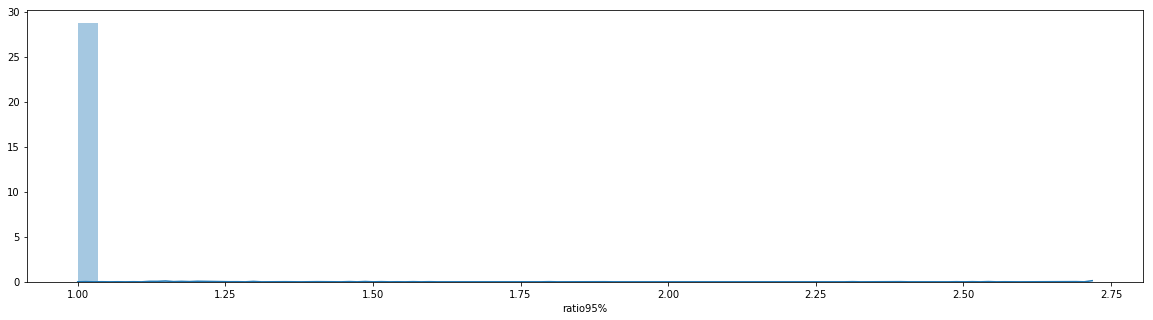

In [50]:
fig,ax = plt.subplots(figsize=(20,5))
sns.distplot(ff['ratio95%'],ax=ax);

## Ratios to expect:

In [10]:
df = pd.read_csv('../Data/intermediate/baseline_df.csv')
df = df.set_index('pixel_id')

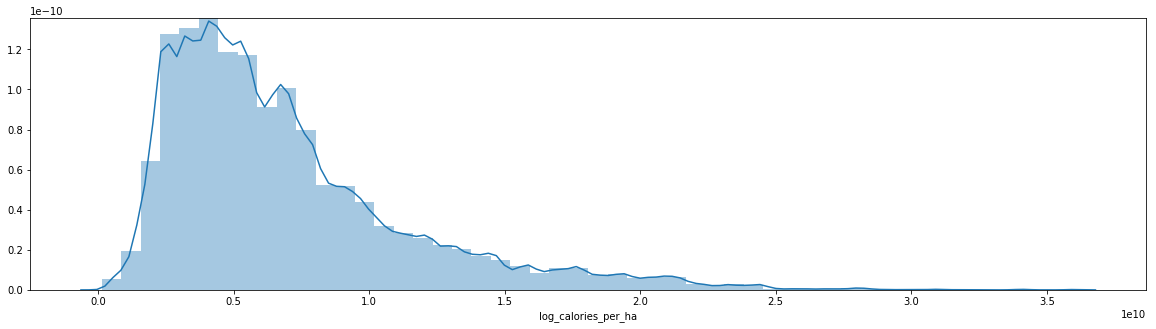

In [13]:
cal_per_ha = df['log_calories_per_ha'].apply(lambda x:np.exp(x))
fig,ax = plt.subplots(figsize=(20,5))
sns.distplot(cal_per_ha,ax=ax);

In [12]:
cal_per_ha.describe()

count    9.067970e+05
mean     6.947075e+09
std      4.561124e+09
min      1.305459e+08
25%      3.722623e+09
50%      5.700472e+09
75%      8.766609e+09
max      3.603413e+10
Name: log_calories_per_ha, dtype: float64

## Things I'd like to do
Make sure to filter out yields=0 + normalize all inputs (but not response variable!)

--> Visualize clusters spatially: on a worldmap, color similarly the points where inputs are more similar